## Well basics

Some preliminaries...

In [1]:
%matplotlib inline
import welly
welly.__version__

'0.1.0'

## Load a well

Use the `from_las()` method to load a well by passing a filename as a `str`. 

This is really just a wrapper for `lasio` but instantiates a `Header`, `Curve`s, etc.

In [2]:
from welly import Well
w = Well.from_las('P-129_out.LAS')

In [3]:
w  # There is no __repr__() function yet.

## Header

Maybe should be called 'meta' as it's not really a header... 

In [4]:
w.header

{'name': 'Kennetcook #2', 'field': 'Windsor Block', 'license': 'P-129'}

In [5]:
w.header.name

'Kennetcook #2'

## Curves

Just a list of objects.

In [6]:
w.curves  # Just a dict of curves objects.

{'CALI': <welly.curve.Curve at 0x10659a0f0>,
 'DEPT': <welly.curve.Curve at 0x107dfbfd0>,
 'DPHI_DOL': <welly.curve.Curve at 0x10b89e160>,
 'DPHI_LIM': <welly.curve.Curve at 0x10b890be0>,
 'DPHI_SAN': <welly.curve.Curve at 0x10a243f98>,
 'DRHO': <welly.curve.Curve at 0x10b89e4a8>,
 'DT': <welly.curve.Curve at 0x10a243c88>,
 'DTS': <welly.curve.Curve at 0x10a243ef0>,
 'GR': <welly.curve.Curve at 0x10b89e518>,
 'HCAL': <welly.curve.Curve at 0x10a233f98>,
 'NPHI_DOL': <welly.curve.Curve at 0x10b89e278>,
 'NPHI_LIM': <welly.curve.Curve at 0x10b89e240>,
 'NPHI_SAN': <welly.curve.Curve at 0x10b89e208>,
 'PEF': <welly.curve.Curve at 0x10a243c50>,
 'RHOB': <welly.curve.Curve at 0x10b89e4e0>,
 'RLA1': <welly.curve.Curve at 0x10b89e358>,
 'RLA2': <welly.curve.Curve at 0x10b89e390>,
 'RLA3': <welly.curve.Curve at 0x10b89e2e8>,
 'RLA4': <welly.curve.Curve at 0x10b89e320>,
 'RLA5': <welly.curve.Curve at 0x10b89e2b0>,
 'RM_HRLT': <welly.curve.Curve at 0x10b89e470>,
 'RT_HRLT': <welly.curve.Curve at 

In [7]:
w.curves['GR'].basis[:15]

array([ 1.0668,  1.2192,  1.3716,  1.524 ,  1.6764,  1.8288,  1.9812,
        2.1336,  2.286 ,  2.4384,  2.5908,  2.7432,  2.8956,  3.048 ,
        3.2004])

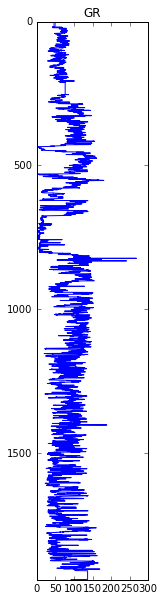

In [8]:
w.curves['GR'].plot()

In [9]:
gr = w.curves['GR']
gr.read_at(1001)

97.99112340886289

In [10]:
gr.read_at([1001, 1003, 1004])

array([  97.99112341,  116.8162655 ,  104.1488654 ])

mean


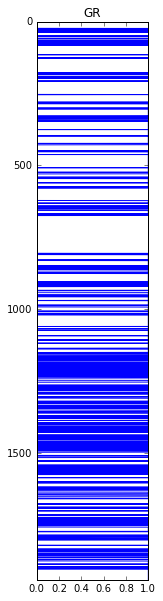

In [11]:
import numpy as np
gr.block(function=np.mean).plot()

## Not implemented yet

PUT WISHED-FOR APIS HERE.

A method to get a subset of the curve, from arbitrary depth to arbitrary depth, possibly resampling.

In [10]:
w.curves['GR'].segment((1000, 1200), return_basis=True)   # optional: new step  # optional pass back basis

NotImplementedError: We haven't written this functoin yet!

In [23]:
import numpy as np
a = np.array([5,4,4,3.5, 3, 2.9, 3.5, 4, 6, 7, 6.5, 4, 2])
bins = np.linspace(np.amin(a), np.amax(a), 4+1)
np.digitize(a, bins=bins[:-1])

array([2, 1, 1, 1, 0, 0, 1, 1, 3, 3, 3, 1, 0])

In [25]:
bins[:-1]

array([ 2.  ,  3.25,  4.5 ,  5.75])

In [47]:
def find_edges(a):
    """
    Return two arrays: one of the changes, and one of the values.

    Returns:
        tuple: Two ndarrays, tops and values.
    """
    print(a)
    
    edges = a[1:] == a[:-1]
    print(edges)
    
    tops = np.where(~edges)[0] + 1
    tops = np.append(0, tops)
    print(tops)

    values = a[tops]

    return tops, values


In [63]:
a = np.array([3,3,4,4,4,4,6,6,4,4,2,2,1])
t, _ = find_edges(a)
t

[3 3 4 4 4 4 6 6 4 4 2 2 1]
[ True False  True  True  True False  True False  True False  True False]
[ 0  2  6  8 10 12]


array([ 0,  2,  6,  8, 10, 12])

In [64]:
def f(x):
    return x + 10

In [65]:
for top, base in zip(t[:-1], t[1:]):
    a[top:base] = f(a[top:base])
a[base:] = f(a[base:])

In [66]:
a

array([13, 13, 14, 14, 14, 14, 16, 16, 14, 14, 12, 12, 11])

In [67]:
list(zip(t[:-1], t[1:]))

[(0, 2), (2, 6), (6, 8), (8, 10), (10, 12)]